#Matthew Joel#
#Interpolating Polynomials Using Linear Algebra#

Let's use Python and Cholesky decompositon to solve the following linear system:
$$
\begin{bmatrix}
4 & -6 & 2 \\
-6 & 34 & 12 \\
2 & 12 & 14
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
\begin{bmatrix}
-24 \\
126 \\
46
\end{bmatrix}.
$$

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def chol(A):
    """
    Perform Cholesky algorithm for a symmetric positive-definite
    matrix A
    A: symmetric positive-definite matrix. A is changed in place in this code
    Return: R, an upper-triangular matrix such that A=R^TR
    """
    if not np.array_equal(A.T,A):
        print('Error: the matrix A is not symmetric!')
        return

    n = A.shape[0]
    R = np.zeros((n,n))
    for k in range(n):
        if A[k,k]<0:
            print('Error: the matrix is no positive-definite!')
            return
        R[k,k] = np.sqrt(A[k,k])
        u = A[k,k+1:n]/R[k,k]
        R[k,k+1:n] = u
        A[k+1:n, k+1:n] -= np.outer(u,u)

    return R

"""
example from book
A = np.array([[1., -3, -2], [-3, 10, 9],[-2, 9, 29]])
R = chol(A)
print('R = \n', R)
b = np.array([[0,-5,-47]])
c = np.linalg.solve(R.T,b.T)
print('C = \n',c)
x = np.linalg.solve(R,c)
print('X = \n',x)
"""

A = np.array([[4., -6, 2], [-6, 34, 12],[2, 12, 14]])
R = chol(A)
print('R = \n', R)
b = np.array([[-24,126,46]])
c = np.linalg.solve(R.T,b.T)
print('\nC = \n',c)
x = np.linalg.solve(R,c)
print('\nX = \n',x)

R = 
 [[ 2. -3.  1.]
 [ 0.  5.  3.]
 [ 0.  0.  2.]]

C = 
 [[-12.]
 [ 18.]
 [  2.]]

X = 
 [[-2.]
 [ 3.]
 [ 1.]]


# Second Degree Polynomial
Consider a function $f(x)$ such that $f(2)=1.5713$, $f(3)=1.5719,f(5)=1.5738,$
and $f(6)=1.5751.$ We will estimate $f(4)$ using a second degree interpolating
polynomial (interpolating the first three data points) and a third degree interpolating polynomial (interpolating the first four data points). We will also compare the two to see if there's any advantage here in using a third degree interpolating polynomial.

In [18]:
#p2(x) = a + b*x + c*x^2

#p2(2) = a + b*2 + c*4 = 1.5713
#p2(3) = a + b*3 + c*9 = 1.5719
#p2(5) = a + b*5 + c*25 = 1.5738

A = np.array([[1, 2, 4], [1, 3, 9],[1, 5, 25]])
print("A =\n",A)
y = np.array([[1.5713, 1.5719, 1.5738]]).T
print("\ny=\n",y)
coeff = np.linalg.solve(A,y)
print ("\nCoefficients =\n",coeff)
print("\np2(x) = 1.57080000e+00 +  1.66666667e-05*x +  1.16666667e-04*x^2 \np2(4) =",round(1.57080000e+00 +  1.66666667e-05*4 +  1.16666667e-04*4**2,4))


A =
 [[ 1  2  4]
 [ 1  3  9]
 [ 1  5 25]]

y=
 [[1.5713]
 [1.5719]
 [1.5738]]

Coefficients =
 [[1.57080000e+00]
 [1.66666667e-05]
 [1.16666667e-04]]

p2(x) = 1.57080000e+00 +  1.66666667e-05*x +  1.16666667e-04*x^2 
p2(4) = 1.5727


In [19]:
#p3(x) = a + b*x + c*x^2 + d*x^3

#p3(2) = a + b*2 + c*4 + d*8 = 1.5713
#p3(3) = a + b*3 + c*9 + d*27 = 1.5719
#p3(5) = a + b*5 + c*25 + d*125 = 1.5738
#p3(6) = a + b*6 + c*36 + d*216 = 1.5751

A = np.array([[1, 2, 4, 8], [1, 3, 9, 27],[1, 5, 25, 125],[1, 6, 36, 216]])
print("A =\n",A)
y = np.array([[1.5713, 1.5719, 1.5738, 1.5751]]).T
print("\ny=\n",y)
coeff = np.linalg.solve(A,y)
print ("\nCoefficients =\n",coeff)
print("\np3(x) = 1.57080000e+00 +  1.66666667e-05*x +  1.16666667e-04*x^2 + 0.00000000e+00*x^3 \np3(4) =",round(1.57080000e+00 +  1.66666667e-05*4 +  1.16666667e-04*4**2 + 0.00000000e+00*4**3,4))


A =
 [[  1   2   4   8]
 [  1   3   9  27]
 [  1   5  25 125]
 [  1   6  36 216]]

y=
 [[1.5713]
 [1.5719]
 [1.5738]
 [1.5751]]

Coefficients =
 [[1.57080000e+00]
 [1.66666667e-05]
 [1.16666667e-04]
 [0.00000000e+00]]

p3(x) = 1.57080000e+00 +  1.66666667e-05*x +  1.16666667e-04*x^2 + 0.00000000e+00*x^3 
p3(4) = 1.5727


There is no advantage here using a third degree polynomial over a second degree. This is because d = 0.

# Inverse Interpolation
This problem discusses inverse interpolation which gives another method
to find the root of a function. Let $f$ be a continuous function on $[a, b]$ with one root $p$ in the interval. Also assume $f$ has an inverse. Let $x_0, x_1, \dots, x_n$ be $n + 1$ distinct numbers in $[a, b]$ with
$f(x_i) = y_i$, $i = 0, 1,\dots, n$. We can construct an interpolating polynomial $P_n$ for $f^{-1}(x)$, by taking our data
points as $(y_i, x_i)$, $i = 0, 1, \dots, n$. Observe that $f^{-1}(0) = p$, the root we are trying to find. Then, let's approximate the root $p$, by evaluating the interpolating polynomial for $f^{-1}$ at $0$, i.e., $P_n(0)\approx p$. Using this method, and the following data, we can find an approximation to the solution of $\log x = 0$.

| $x$ | 0.4 | 0.8 | 1.2 | 1.6|
| --- | --- | --- |--- |---|
| $\log{x}$ | -0.92 | -0.22 | 0.18 | 0.47 |

In [20]:
#p3(y) = a + b*y + c*y^2 + d*y^3

#p3(-.92) = a + b*-.92 + c*-.92**2 + d*-.92**3 = 0.4
#p3(-.22) = a + b*-.22 + c*-.22**2 + d*-.22**3 = 0.8
#p3(0.18) = a + b*0.18 + c*0.18**2 + d*0.18**3 = 1.2
#p3(0.47) = a + b*0.47 + c*0.47**2 + d*0.47**3 = 1.6

A = np.array([[1, -.92, (-.92)**2, (-.92)**3], [1, -.22, (-.22)**2, (-.22)**3],[1, .18, .18**2, .18**3],[1, .47, .47**2, .47**3]])
print("A =\n",A)
x = np.array([[.4, .8, 1.2, 1.6]]).T
print("\nx=\n",x)
coeff = np.linalg.solve(A,x)
print ("\nCoefficients =\n",coeff)
print("\np3(y) = 1.00037481 + 1.01526188*y + 0.50019324*y^2 + 0.11519047*y^3 \np3(0) =",1.00037481 + 1.01526188*0 + 0.50019324*0 + 0.11519047*0)


A =
 [[ 1.       -0.92      0.8464   -0.778688]
 [ 1.       -0.22      0.0484   -0.010648]
 [ 1.        0.18      0.0324    0.005832]
 [ 1.        0.47      0.2209    0.103823]]

x=
 [[0.4]
 [0.8]
 [1.2]
 [1.6]]

Coefficients =
 [[1.00037481]
 [1.01526188]
 [0.50019324]
 [0.11519047]]

p3(y) = 1.00037481 + 1.01526188*y + 0.50019324*y^2 + 0.11519047*y^3 
p3(0) = 1.00037481


# Hermite Interpolating

Suppose we have a table giving the values of $y=f(x)$ and $y'=f'(x)$ where $f(x)=e^x+\sin 10x$. This allows us to compute the Hermite interpolating polynomial and the polynomial interpolant for the data in the table. Then, we should plot the two interpolating polynomials together with $f(x)=e^x+\sin 10x$ on $(0,3)$ and compare.

| $x$ | 0 | 0.4 | 1 | 2 | 2.6 | 3 |
| --- | --- | --- | --- | ---| --- | --- |
| $y$ | 1 | 0.735 | 2.17 | 8.30 | 14.2 | 19.1 |
| $y'$ | 11 | -5.04 | -5.67 | 11.5 | 19.9 | 21.6 |

In [21]:
#p5(x) = a + b*x + c*x^2 + d*x^3 + e*x^4 + f*x^5

#p5(0) = a + b*0 + c*0**2 + d*0**3 + e*0**4 + f*0**5 = 1
#p5(0.4) = a + b*0.4 + c*0.4**2 + d*0.4**3 + e*0.4**4 + f*0.4**5 = .735
#p5(1) = a + b*1 + c*1**2 + d*1**3 + e*1**4 + f*1**5 = 2.17
#p5(2) = a + b*2 + c*2**2 + d*2**3 + e*2**4 + f*2**5 = 8.30
#p5(2.6) = a + b*2.6 + c*2.6**2 + d*2.6**3 + e*2.6**4 + f*2.6**5 = 14.2
#p5(3) = a + b*3 + c*3**2 + d*3**3 + e*3**4 + f*3**5 = 19.1


x = np.array([0, 0.4, 1, 2, 2.6, 3])
y = np.array([1, .735, 2.17, 8.30, 14.2, 19.1])
yprime = np.array([11, -5.04, -5.67, 11.5, 19.9, 21.6])

A = np.array([[1, 0, 0**2, 0**3, 0**4, 0**5], [1, 0.4, 0.4**2, 0.4**3, 0.4**4, 0.4**5],[1, 1, 1**2, 1**3, 1**4, 1**5],[1, 2, 2**2, 2**3, 2**4, 2**5],[1, 2.6, 2.6**2, 2.6**3, 2.6**4, 2.6**5],[1, 3, 3**2, 3**3, 3**4, 3**5]])
coeff = np.linalg.solve(A,y.T)
print ("\nCoefficients =\n",coeff)
print("\np5(x) = 1 - 2.21184586*x + 4.3226435*x**2 - 1.25956221*x**3 + 0.35567818*x**4 - 0.03691361*x**5")
def pinterp(x):
  y = 1 - 2.21184586*x + 4.3226435*x**2 - 1.25956221*x**3 + 0.35567818*x**4 - 0.03691361*x**5
  return y


Coefficients =
 [ 1.         -2.21184586  4.3226435  -1.25956221  0.35567818 -0.03691361]

p5(x) = 1 - 2.21184586*x + 4.3226435*x**2 - 1.25956221*x**3 + 0.35567818*x**4 - 0.03691361*x**5


In [22]:
def hdiff(x, y, yprime):
    m = x.size # here m is the number of data points. Note n=m-1
    # and 2n+1=2m-1
    l = 2*m
    z = np.zeros(l)
    print(z)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): # computes the first divided
        # differences using derivatives
        a[2*i+1] = yprime[i]
        a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l): # computes the rest of the divided differences
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a

In [23]:
def hermite(x, y, yprime, w):
    m = x.size # here m is the number of data points. not the
    # degree of the polynomial
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


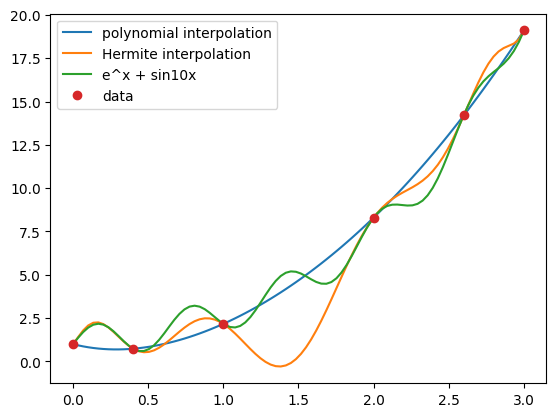

In [24]:
xaxis = np.linspace(0, 3, 90)
funct = math.e**(xaxis) + np.sin(10*xaxis)
hinterp = hermite(x, y, yprime, xaxis)
interp = pinterp(xaxis)
plt.plot(xaxis, interp, label='polynomial interpolation')
plt.plot(xaxis, hinterp, label='Hermite interpolation')
plt.plot(xaxis, funct, label="e^x + sin10x")
plt.plot(x, y, 'o', label='data')
plt.legend(loc='upper left');